(506, 14)
CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64
(394, 14)
Correlation matrix: 
              CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.188075  0.391552 -0.051970  0.416160 -0.227170  0.341311   
ZN      -0.188075  1.000000 -0.521256 -0.033357 -0.515660  0.343210 -0.568174   
INDUS    0.391552 -0.521256  1.000000  0.049820  0.762737 -0.403068  0.642387   
CHAS    -0.051970 -0.033357  0.049820  1.000000  0.076661  0.095308  0.072644   
NOX      0.416160 -0.515660  0.762737  0.076661  1.000000 -0.316563  0.732540   
RM      -0.227170  0.343210 -0.403068  0.095308 -0.316563  1.000000 -0.248670   
AGE      0.341311 -0.568174  0.642387  0.072644  0.732540 -0.248670  1.000000   
DIS     -0.365052  0.645359 -0.696569 -0.095037 -0.768137  0.218713 -0.753547   
RAD      0.608667 -0

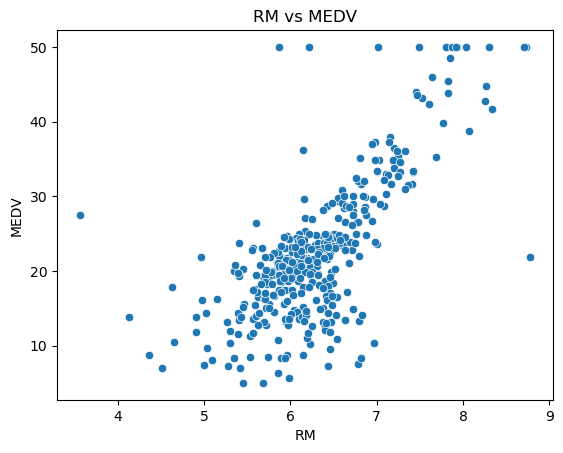

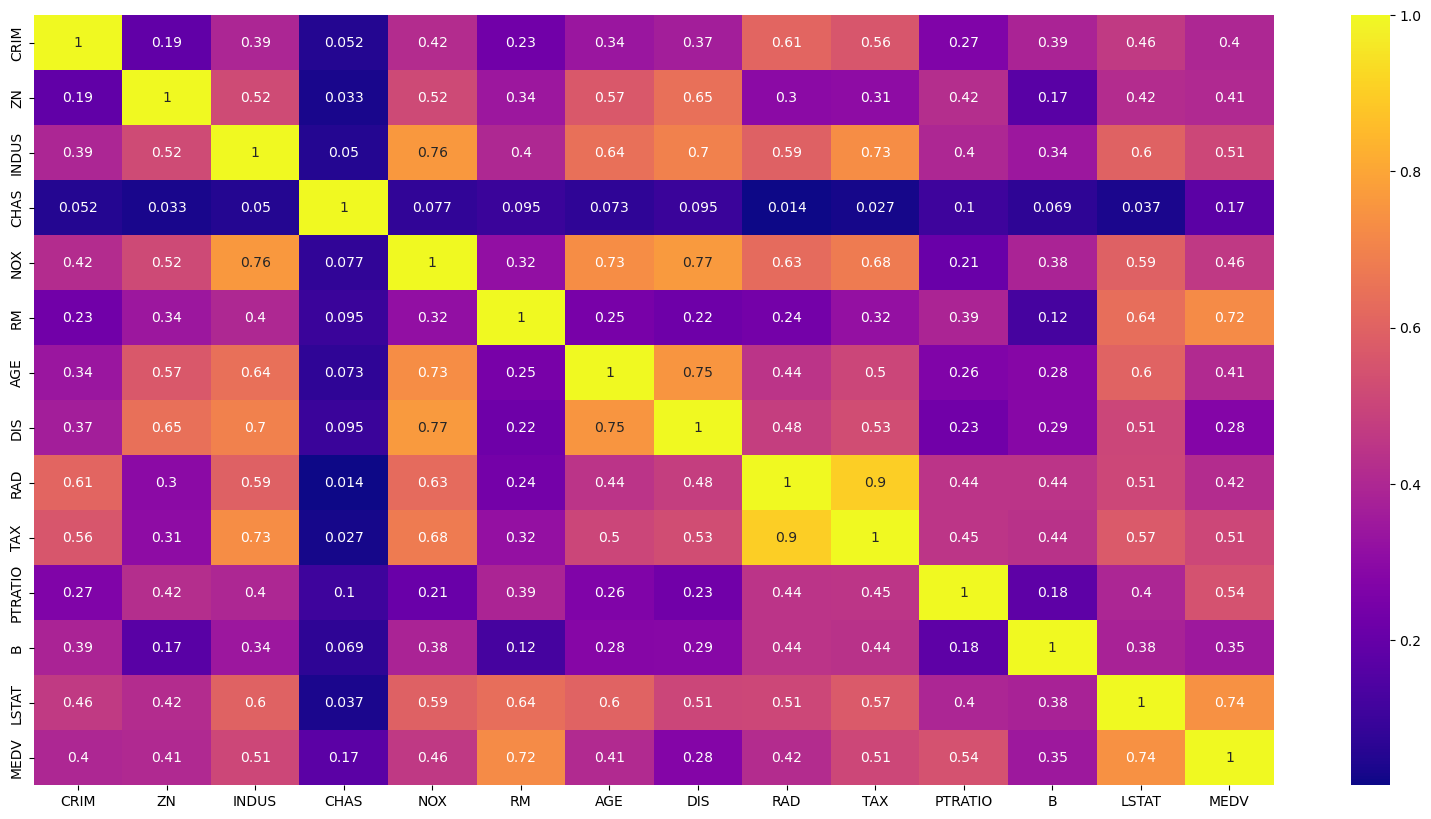

Model coefficients:  [-0.11, 0.04, 0.03, 1.98, -17.08, 4.26, -0.02, -1.42, 0.24, -0.01, -0.98, 0.01, -0.39]
Intercept:  33.65
Mean Squared Error:  31.45
R2 score:  0.63


In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression                   
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

data = pd.read_csv('HousingData.xls')

#original dimension of dataset before dropning rows
print(np.shape(data))

#number of NAN values in the dataset
print(data.isnull().sum())

#dropping rows with missing values
data = data.dropna()
#dimension of dataset after dropning rows
print(np.shape(data))

#values when dropna() is used
'''
Model coefficients:  [-0.11, 0.04, 0.03, 1.98, -17.08, 4.26, -0.02, -1.42, 0.24, -0.01, -0.98, 0.01, -0.39]
Intercept:  33.65
Mean Squared Error:  31.45
R2 score:  0.63
'''

#filling missing values with mean
#data = data.fillna(data.mean(numeric_only=True))
#print(data.isnull().sum())

#values when fillna() is used
'''
Model coefficients:  [-0.11, 0.03, -0.03, 3.24, -16.02, 4.75, -0.02, -1.52, 0.22, -0.01, -0.89, 0.01, -0.44]
Intercept:  27.91
Mean Squared Error:  25.02
R2 score:  0.66
'''

cor_mat = data.corr()
print("Correlation matrix: \n",cor_mat)

print("Correlation of features with MEDV:\n", cor_mat["MEDV"].sort_values(ascending=False))

sns.scatterplot(x=data["RM"], y=data["MEDV"])
plt.title("RM vs MEDV")
plt.show()



plt.figure(figsize=(20, 10))
sns.heatmap(cor_mat.abs(),  annot=True, cmap = "plasma")
plt.show()


X = data.drop("MEDV", axis=1)
y = data["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rounded_coeffs = [round(float(c), 2) for c in model.coef_]

print("Model coefficients: ", rounded_coeffs)
print("Intercept: ", round(float(model.intercept_), 2))
print("Mean Squared Error: ", round(mse, 2))
print("R2 score: ", round(r2, 2))


In [41]:
sample_input = [0.1,18.0,2.31,0,0.538,6.575,65.2,4.09,1,29.6,15.3,396.9,4.98]
sample_df = pd.DataFrame([sample_input], columns = X.columns)
prediction = model.predict(sample_df)[0]

inr_price = prediction*1000*83.5

print(f"Predicted House Price: Rs.{inr_price:.2f}")

Predicted House Price: Rs.2743217.00
